## Libraries and clases used

In [1]:
from population import Population
from pandas import DataFrame

## Auxiliar functions

In [2]:
def display_best_experiment(exp_reports):
    min_number_of_generation = min(list(map(lambda r: r.number_of_generations, exp_reports)))
    report_with_less_generations = list(filter(lambda r: r.number_of_generations ==min_number_of_generation,exp_reports ))
    for report in report_with_less_generations:
        report.display_results()  
        report.display_solutions()

In [3]:
def display_worst_experiment(exp_reports):
    max_number_of_generation = max(list(map(lambda r: r.number_of_generations, exp_reports)))
    report_with_more_generations = list(filter(lambda r: r.number_of_generations ==max_number_of_generation,exp_reports ))
    for report in report_with_more_generations:
        report.display_results()  

In [4]:
def display_all_experiments(exp_reports):
    for report in exp_reports:
        report.display_results()

In [5]:
def display_settings(settings):
    print("Settings used:")
    print(f"* HIGHEST GENE: {settings.HIGHEST_GENE_VALUE}")
    print(f"* NUMBER OF EXPERIMENTS: {settings.NUMBER_OF_EXPERIMENTS}")
    print(f"* NUMBER GENES: {settings.NUMBER_GENES}")
    print(f"* CHROMOSOME POPULATION: {settings.CHROMOSOME_POPULATION}")
    print(f"* MAX FF: {settings.MAX_FF}")
    print(f"* CHROMOSOME POPULATION: {settings.CHROMOSOME_POPULATION}")
    print(f"* MAX GENERATIONS: {settings.MAX_GENERATIONS}")
    print(f"* CROSSOVER PROB: {settings.CROSSOVER_PROB}")
    print(f"* MUTATION PROB: {settings.MUTATION_PROB}")

In [6]:
def display_average_result(population, exp_reports):
    number_of_generations = list(map(lambda r: r.number_of_generations, exp_reports))
    max_ffs = list(map(lambda r: r.max_ffs_for_generation[-1], exp_reports))
    min_ffs = list(map(lambda r: r.min_ffs_for_generation[-1], exp_reports))
    mean_ffs = list(map(lambda r: r.mean_ffs_for_generation[-1], exp_reports))
    df_results = DataFrame({"Generations": number_of_generations, "Max Fitness functions found": max_ffs, "Min fitness function found": min_ffs, "Average fistness function":mean_ffs}, index=list(range(1, population.setting.NUMBER_OF_EXPERIMENTS + 1)))
    average = sum(number_of_generations)/len(number_of_generations)
    display_settings(population.setting)
    print(f"The average of generations required to find the strongest FF is {average}")
    return df_results


# Experiments

## 1 Apply the genetic algorithm to a population with the following characteristics
* pc = 0.7
* pm = 0.001
* 20 genes
* 100 chromosomes
* 20 iterations

### All experiments results

In [7]:
p_1 = Population()
reports_1 = p_1.run_experiment()
# display_all_experiments(reports_1)

### Best experiment result

Experiment:  0
Number of generations: 9
Max FF: 20
Min FF: 9
Mean FF: 14.23


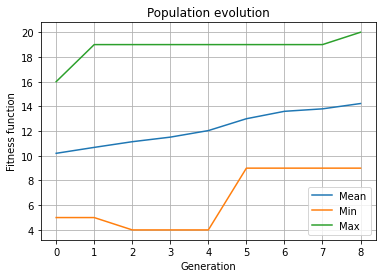

Solutions found:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
display_best_experiment(reports_1)

### Worst experiment result

Experiment:  2
Number of generations: 100
Max FF: 19
Min FF: 16
Mean FF: 18.5


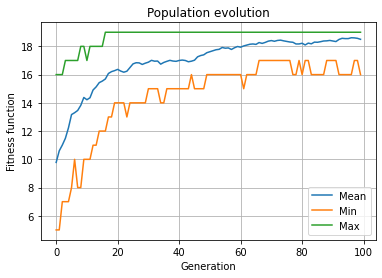

Experiment:  5
Number of generations: 100
Max FF: 19
Min FF: 18
Mean FF: 18.68


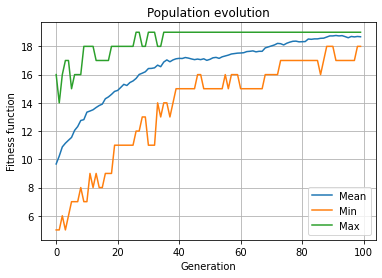

Experiment:  15
Number of generations: 100
Max FF: 19
Min FF: 16
Mean FF: 18.11


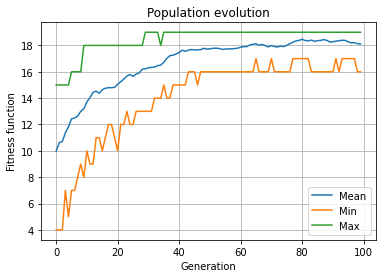

Experiment:  16
Number of generations: 100
Max FF: 19
Min FF: 18
Mean FF: 18.84


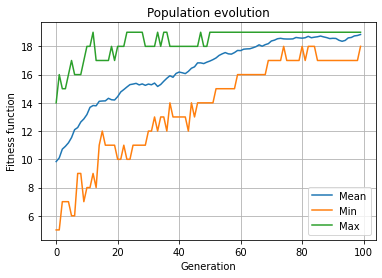

In [9]:
display_worst_experiment(reports_1) 

### Average Result

In [10]:
display_average_result(p_1, reports_1)

Settings used:
* HIGHEST GENE: 1
* NUMBER OF EXPERIMENTS: 20
* NUMBER GENES: 20
* CHROMOSOME POPULATION: 100
* MAX FF: 20
* CHROMOSOME POPULATION: 100
* MAX GENERATIONS: 100
* CROSSOVER PROB: 0.7
* MUTATION PROB: 0.001
The average of generations required to find the strongest FF is 45.85


,Generations,Max Fitness functions found,Min fitness function found,Average fistness function
1,9,20,9,14.23
2,22,20,11,16.33
3,100,19,16,18.50
4,19,20,11,16.19
5,48,20,14,16.98
6,100,19,18,18.68
7,32,20,13,16.90
8,25,20,12,15.82
9,35,20,13,16.95
10,56,20,15,17.55


## 2. Apply the genetic algorithm to a population with the following characteristics
* pc = 0
* pm = 0.001
* 20 genes
* 100 chromosomes
* 20 iterations
* The max number of generations for experiments was setted as 50

### All experiments results

In [11]:
p_2 = Population()
p_2.setting.CROSSOVER_PROB = 0
p_2.setting.MAX_GENERATIONS = 50
reports_2 = p_2.run_experiment()
# display_all_experiments(reports_2)

### Conclusion

In this case we would need tons of generations and luck in order to get the strongest FF.
As we can see in the images the mean and the min FF are incrementings but the max FF stays constante, thats may be bacause of the "selection of chromosomes" based on probability weights. It seams that the crossover is crutial in order to get the strongest FF

## 3. Apply the genetic algorithm to a population with the following characteristics
* pc = 0,7
* pm = 0
* 20 genes
* 100 chromosomes
* 20 iterations
* The max number of generations for experiments was setted as 50

### All experiments results

In [12]:
p_3 = Population()
p_3.setting.MUTATION_PROB = 0
reports_3 = p_3.run_experiment()
# display_all_experiments(reports_3)

### Best experiment result

Experiment:  0
Number of generations: 10
Max FF: 20
Min FF: 11
Mean FF: 14.86


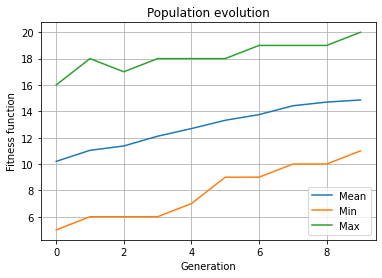

Solutions found:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
display_best_experiment(reports_3)

### Worst experiment result

Experiment:  15
Number of generations: 100
Max FF: 19
Min FF: 18
Mean FF: 18.74


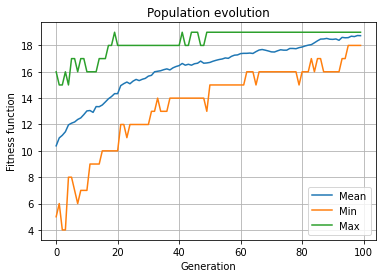

In [14]:
display_worst_experiment(reports_3)

### Average Result

In [15]:
display_average_result(p_3, reports_3)

Settings used:
* HIGHEST GENE: 1
* NUMBER OF EXPERIMENTS: 20
* NUMBER GENES: 20
* CHROMOSOME POPULATION: 100
* MAX FF: 20
* CHROMOSOME POPULATION: 100
* MAX GENERATIONS: 100
* CROSSOVER PROB: 0.7
* MUTATION PROB: 0
The average of generations required to find the strongest FF is 29.45


,Generations,Max Fitness functions found,Min fitness function found,Average fistness function
1,10,20,11,14.86
2,20,20,11,14.39
3,27,20,11,16.34
4,21,20,11,15.73
5,18,20,13,16.43
6,30,20,13,16.56
7,25,20,14,16.73
8,53,20,15,17.34
9,21,20,13,16.27
10,24,20,12,15.68


## 4. Apply the genetic algorithm to a population with the following characteristics
* pc = 0,9
* pm = 0.001
* 20 genes
* 100 chromosomes
* 20 iterations
* The max number of generations for experiments was setted as 100

### All experiments results

In [16]:
p_4 = Population()
p_4.setting.CROSSOVER_PROB = 0.9
reports_4 = p_4.run_experiment()
# display_all_experiments(reports_4)

### Best experiment result

Experiment:  12
Number of generations: 6
Max FF: 20
Min FF: 6
Mean FF: 13.35


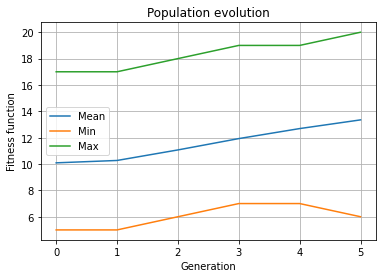

Solutions found:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [17]:
display_best_experiment(reports_4)

### Worst experiment result

Experiment:  9
Number of generations: 100
Max FF: 19
Min FF: 17
Mean FF: 18.74


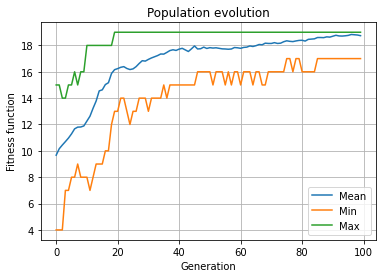

Experiment:  11
Number of generations: 100
Max FF: 19
Min FF: 19
Mean FF: 19.0


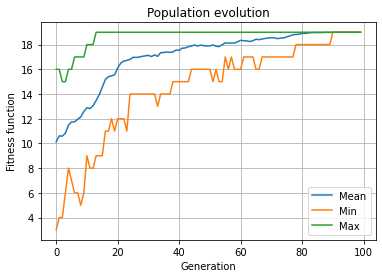

In [18]:
display_worst_experiment(reports_4)

### Average Result

In [19]:
display_average_result(p_4, reports_4)

Settings used:
* HIGHEST GENE: 1
* NUMBER OF EXPERIMENTS: 20
* NUMBER GENES: 20
* CHROMOSOME POPULATION: 100
* MAX FF: 20
* CHROMOSOME POPULATION: 100
* MAX GENERATIONS: 100
* CROSSOVER PROB: 0.9
* MUTATION PROB: 0.001
The average of generations required to find the strongest FF is 31.05


,Generations,Max Fitness functions found,Min fitness function found,Average fistness function
1,15,20,8,14.33
2,40,20,14,16.65
3,15,20,10,14.47
4,38,20,14,16.91
5,26,20,12,16.08
6,33,20,13,16.82
7,27,20,12,16.82
8,27,20,12,16.84
9,25,20,10,15.73
10,100,19,17,18.74


## 5. Apply the genetic algorithm to a population with the following characteristics
* pc = 0,3
* pm = 0.001
* 20 genes
* 100 chromosomes
* 20 iterations
* The max number of generations for experiments was setted as 100

### All experiments results

In [20]:
p_5 = Population()
p_5.setting.CROSSOVER_PROB = 0.3
reports_5 = p_5.run_experiment()
# display_all_experiments(reports_5)

### Best experiment result

Experiment:  13
Number of generations: 11
Max FF: 20
Min FF: 10
Mean FF: 14.44


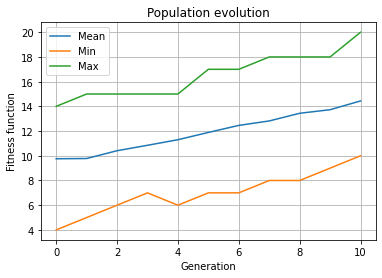

Solutions found:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [21]:
display_best_experiment(reports_5)

### Worst experiment result

Experiment:  1
Number of generations: 100
Max FF: 19
Min FF: 17
Mean FF: 18.59


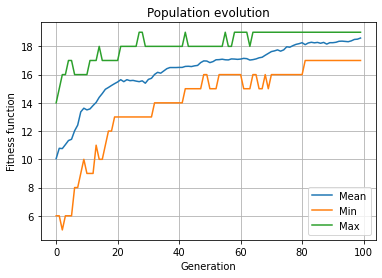

Experiment:  2
Number of generations: 100
Max FF: 19
Min FF: 16
Mean FF: 18.4


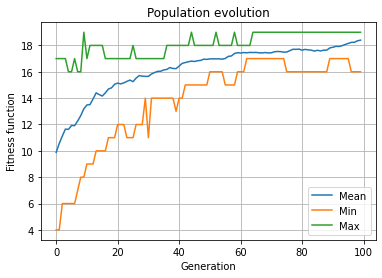

Experiment:  5
Number of generations: 100
Max FF: 19
Min FF: 18
Mean FF: 18.94


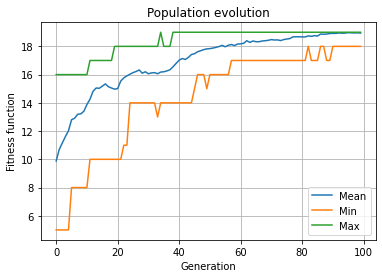

Experiment:  8
Number of generations: 100
Max FF: 19
Min FF: 18
Mean FF: 18.97


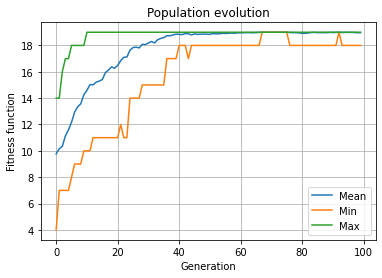

Experiment:  11
Number of generations: 100
Max FF: 19
Min FF: 18
Mean FF: 18.98


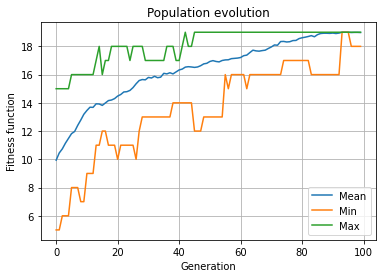

Experiment:  15
Number of generations: 100
Max FF: 18
Min FF: 17
Mean FF: 17.88


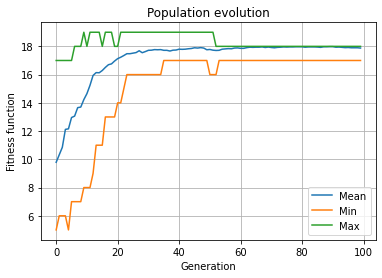

Experiment:  18
Number of generations: 100
Max FF: 18
Min FF: 16
Mean FF: 17.58


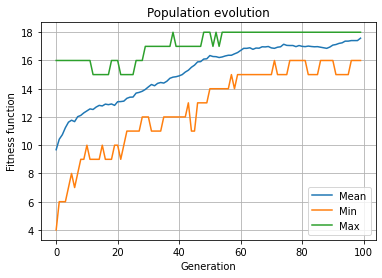

In [22]:
display_worst_experiment(reports_5)

### Average Result

In [23]:
display_average_result(p_5, reports_5)

Settings used:
* HIGHEST GENE: 1
* NUMBER OF EXPERIMENTS: 20
* NUMBER GENES: 20
* CHROMOSOME POPULATION: 100
* MAX FF: 20
* CHROMOSOME POPULATION: 100
* MAX GENERATIONS: 100
* CROSSOVER PROB: 0.3
* MUTATION PROB: 0.001
The average of generations required to find the strongest FF is 62.3


,Generations,Max Fitness functions found,Min fitness function found,Average fistness function
1,42,20,13,16.31
2,100,19,17,18.59
3,100,19,16,18.40
4,45,20,14,17.20
5,23,20,13,16.01
6,100,19,18,18.94
7,22,20,13,17.32
8,38,20,15,18.02
9,100,19,18,18.97
10,53,20,14,17.53


¿Cu´al es la mejor opci´on de par´ametros seg´un los resultados obtenidos anteriormente? ¿Por qu´e?

## 6. Apply the genetic algorithm to a population with the following characteristics
* pc = 0,7
* pm = 0.001
* 20 genes
* 50 chromosomes
* 20 iterations
* The max number of generations for experiments was setted as 100

### All experiments results

In [24]:
p_6 = Population()
p_6.setting.CHROMOSOME_POPULATION = 50
reports_6 = p_6.run_experiment()
# display_all_experiments(reports_6)

### Best experiment result

Experiment:  10
Number of generations: 27
Max FF: 20
Min FF: 14
Mean FF: 16.7


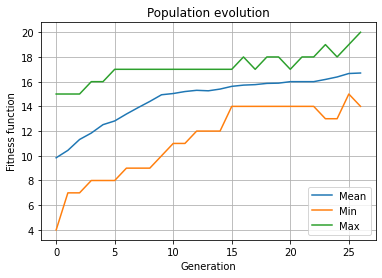

Solutions found:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [25]:
display_best_experiment(reports_6)

### Worst experiment result

Experiment:  1
Number of generations: 100
Max FF: 19
Min FF: 19
Mean FF: 19.0


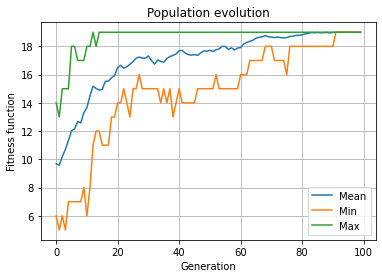

Experiment:  4
Number of generations: 100
Max FF: 17
Min FF: 17
Mean FF: 17.0


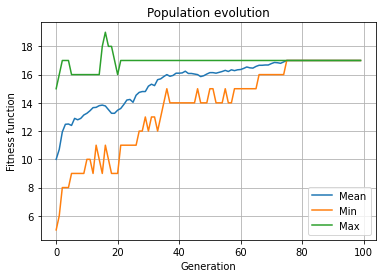

Experiment:  5
Number of generations: 100
Max FF: 19
Min FF: 19
Mean FF: 19.0


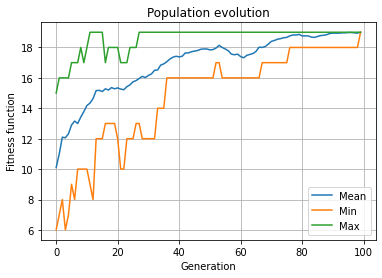

Experiment:  7
Number of generations: 100
Max FF: 19
Min FF: 16
Mean FF: 17.96


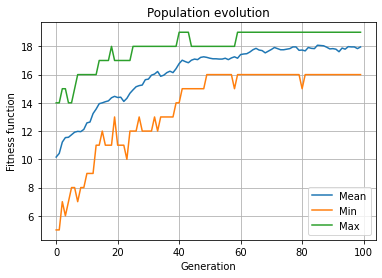

Experiment:  8
Number of generations: 100
Max FF: 17
Min FF: 16
Mean FF: 16.5


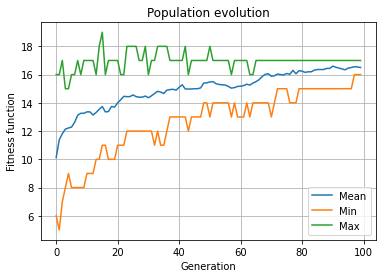

Experiment:  9
Number of generations: 100
Max FF: 19
Min FF: 18
Mean FF: 18.32


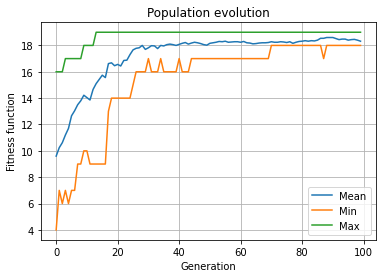

Experiment:  11
Number of generations: 100
Max FF: 19
Min FF: 18
Mean FF: 18.78


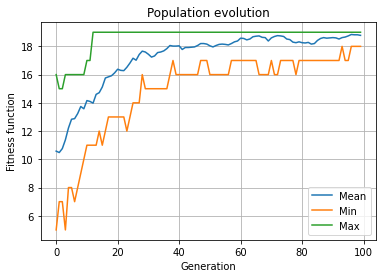

Experiment:  12
Number of generations: 100
Max FF: 18
Min FF: 17
Mean FF: 17.74


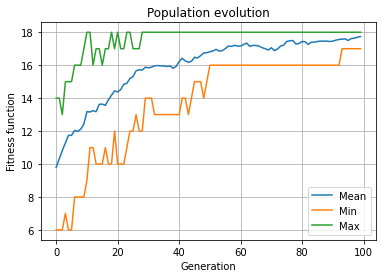

Experiment:  14
Number of generations: 100
Max FF: 19
Min FF: 17
Mean FF: 17.72


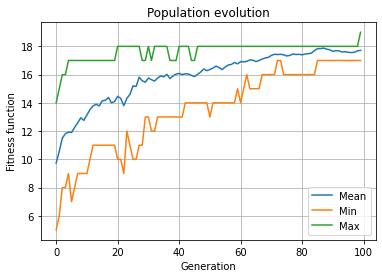

Experiment:  15
Number of generations: 100
Max FF: 19
Min FF: 19
Mean FF: 19.0


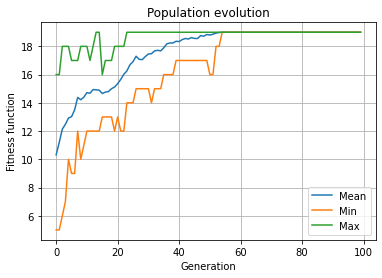

Experiment:  16
Number of generations: 100
Max FF: 16
Min FF: 15
Mean FF: 15.38


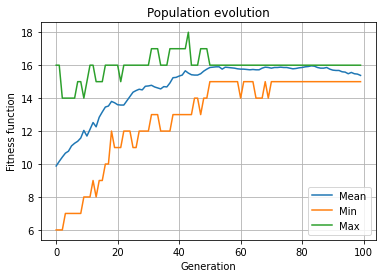

Experiment:  17
Number of generations: 100
Max FF: 18
Min FF: 17
Mean FF: 17.94


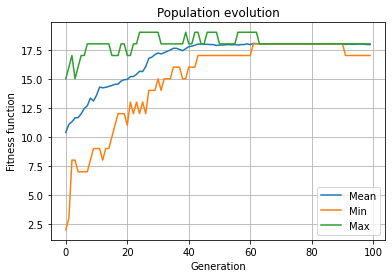

Experiment:  18
Number of generations: 100
Max FF: 19
Min FF: 19
Mean FF: 19.0


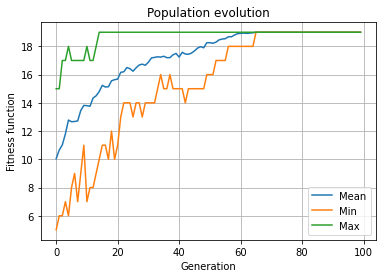

Experiment:  19
Number of generations: 100
Max FF: 18
Min FF: 16
Mean FF: 17.76


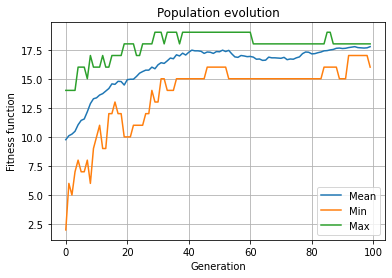

In [26]:
display_worst_experiment(reports_6)

### Average Result

In [27]:
display_average_result(p_6, reports_6)

Settings used:
* HIGHEST GENE: 1
* NUMBER OF EXPERIMENTS: 20
* NUMBER GENES: 20
* CHROMOSOME POPULATION: 50
* MAX FF: 20
* CHROMOSOME POPULATION: 50
* MAX GENERATIONS: 100
* CROSSOVER PROB: 0.7
* MUTATION PROB: 0.001
The average of generations required to find the strongest FF is 81.65


,Generations,Max Fitness functions found,Min fitness function found,Average fistness function
1,28,20,14,16.30
2,100,19,19,19.00
3,46,20,15,17.22
4,33,20,14,17.42
5,100,17,17,17.00
6,100,19,19,19.00
7,58,20,15,17.38
8,100,19,16,17.96
9,100,17,16,16.50
10,100,19,18,18.32


## 7. Apply the genetic algorithm to a population with the following characteristics
* pc = 0,7
* pm = 0.001
* 20 genes
* 500 chromosomes
* 20 iterations
* The max number of generations for experiments was setted as 100

### All experiments results

In [28]:
p_7 = Population()
p_7.setting.CHROMOSOME_POPULATION = 500
reports_7 = p_7.run_experiment()
# display_all_experiments(reports_7)

### Best experiment result

Experiment:  4
Number of generations: 7
Max FF: 20
Min FF: 6
Mean FF: 12.298


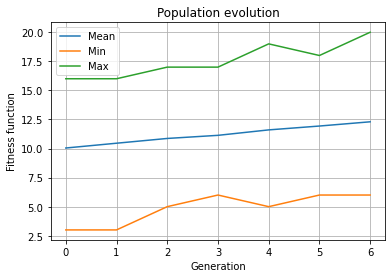

Solutions found:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [29]:
display_best_experiment(reports_7)

### Worst experiment result

Experiment:  13
Number of generations: 22
Max FF: 20
Min FF: 10
Mean FF: 15.682


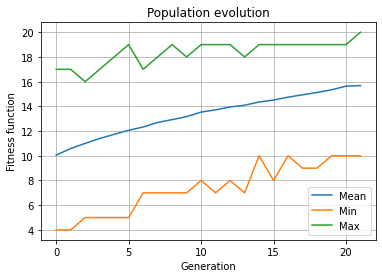

In [30]:
display_worst_experiment(reports_7)

### Average Result

In [31]:
display_average_result(p_7, reports_7)

Settings used:
* HIGHEST GENE: 1
* NUMBER OF EXPERIMENTS: 20
* NUMBER GENES: 20
* CHROMOSOME POPULATION: 500
* MAX FF: 20
* CHROMOSOME POPULATION: 500
* MAX GENERATIONS: 100
* CROSSOVER PROB: 0.7
* MUTATION PROB: 0.001
The average of generations required to find the strongest FF is 14.55


,Generations,Max Fitness functions found,Min fitness function found,Average fistness function
1,16,20,10,14.940
2,9,20,7,13.228
3,13,20,9,14.478
4,10,20,8,13.312
5,7,20,6,12.298
6,16,20,9,14.940
7,12,20,8,14.358
8,19,20,11,15.678
9,15,20,10,14.464
10,15,20,9,14.840


## 8. Apply the genetic algorithm to a population with the following characteristics
* pc = 0,7
* pm = 0.001
* 20 genes
* 1000 chromosomes
* 20 iterations
* The max number of generations for experiments was setted as 100

### All experiments results

In [32]:
p_8 = Population()
p_8.setting.CHROMOSOME_POPULATION = 1000
reports_8 = p_8.run_experiment()
# display_all_experiments(reports_8)

### Best experiment result

Experiment:  10
Number of generations: 8
Max FF: 20
Min FF: 6
Mean FF: 12.89


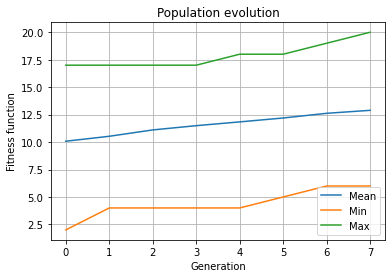

Solutions found:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [33]:
display_best_experiment(reports_8)

### Worst experiment result

Experiment:  5
Number of generations: 18
Max FF: 20
Min FF: 9
Mean FF: 14.915


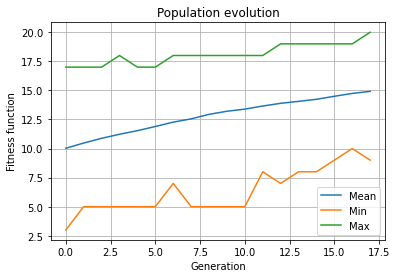

Experiment:  17
Number of generations: 18
Max FF: 20
Min FF: 8
Mean FF: 15.207


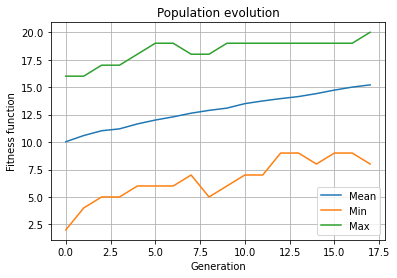

In [34]:
display_worst_experiment(reports_8)

### Average Result

In [35]:
display_average_result(p_8, reports_8)

Settings used:
* HIGHEST GENE: 1
* NUMBER OF EXPERIMENTS: 20
* NUMBER GENES: 20
* CHROMOSOME POPULATION: 1000
* MAX FF: 20
* CHROMOSOME POPULATION: 1000
* MAX GENERATIONS: 100
* CROSSOVER PROB: 0.7
* MUTATION PROB: 0.001
The average of generations required to find the strongest FF is 13.35


,Generations,Max Fitness functions found,Min fitness function found,Average fistness function
1,17,20,8,14.979
2,12,20,8,14.110
3,10,20,6,13.363
4,10,20,7,13.508
5,11,20,6,14.124
6,18,20,9,14.915
7,16,20,8,14.977
8,13,20,8,13.859
9,12,20,7,14.302
10,13,20,7,14.084


## 9. Apply the genetic algorithm to a population with the following characteristics
* pc = 0,7
* pm = 0.001
* 20 genes
* 100 chromosomes
* 100 iterations
* The max number of generations for experiments was setted as 100

### All experiments results

In [36]:
p_9 = Population()
p_9.setting.NUMBER_OF_EXPERIMENTS = 20
reports_9 = p_9.run_experiment()
# display_all_experiments(reports_9)

### Best experiment result

Experiment:  0
Number of generations: 5
Max FF: 20
Min FF: 7
Mean FF: 12.78


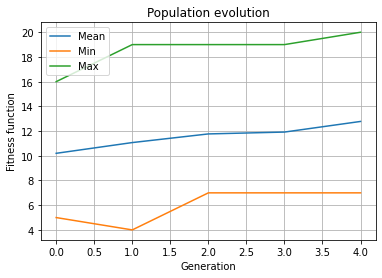

Solutions found:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [37]:
display_best_experiment(reports_9)

### Worst experiment result

Experiment:  3
Number of generations: 100
Max FF: 18
Min FF: 18
Mean FF: 18.0


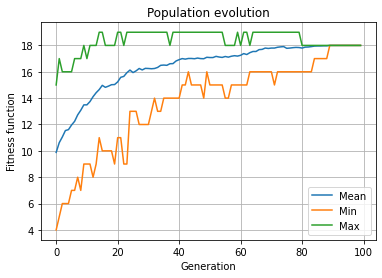

In [38]:
display_worst_experiment(reports_9)

### Average Result

In [39]:
display_average_result(p_9, reports_9)

Settings used:
* HIGHEST GENE: 1
* NUMBER OF EXPERIMENTS: 20
* NUMBER GENES: 20
* CHROMOSOME POPULATION: 100
* MAX FF: 20
* CHROMOSOME POPULATION: 100
* MAX GENERATIONS: 100
* CROSSOVER PROB: 0.7
* MUTATION PROB: 0.001
The average of generations required to find the strongest FF is 29.6


,Generations,Max Fitness functions found,Min fitness function found,Average fistness function
1,5,20,7,12.78
2,32,20,12,16.27
3,52,20,14,16.71
4,100,18,18,18.00
5,21,20,12,15.80
6,26,20,12,16.23
7,29,20,10,15.79
8,28,20,14,16.67
9,26,20,12,15.64
10,20,20,12,16.41


## 10. Apply the genetic algorithm to a population with the following characteristics
* pc = 0,7
* pm = 0.001
* 20 genes
* 100 chromosomes
* 10 iterations
* The max number of generations for experiments was setted as 500
* FF = All ones

### All experiments results

In [40]:
p_10 = Population()
p_10.setting.MAX_GENERATIONS = 500
p_10.setting.set_fitness_function("all ones")
p_10.setting.NUMBER_OF_EXPERIMENTS = 10
reports_10 = p_10.run_experiment()
# display_all_experiments(reports_10)

### Best experiment result

Experiment:  0
Number of generations: 500
Max FF: 29670
Min FF: 29670
Mean FF: 29670.0


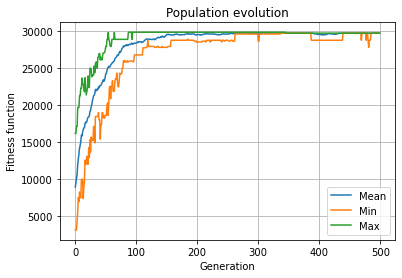

No solution was found, in 500 generations
Experiment:  1
Number of generations: 500
Max FF: 30270
Min FF: 30270
Mean FF: 30270.0


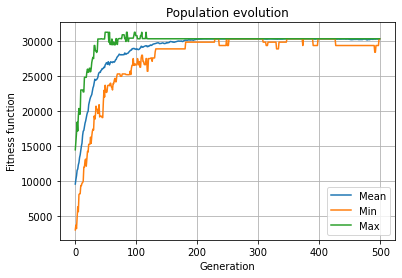

No solution was found, in 500 generations
Experiment:  2
Number of generations: 500
Max FF: 31320
Min FF: 30360
Mean FF: 31300.8


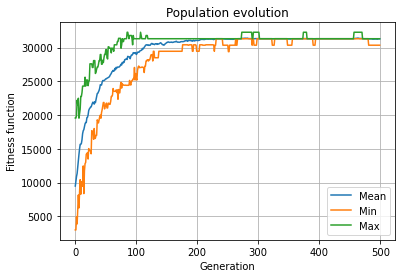

No solution was found, in 500 generations
Experiment:  3
Number of generations: 500
Max FF: 29040
Min FF: 29040
Mean FF: 29040.0


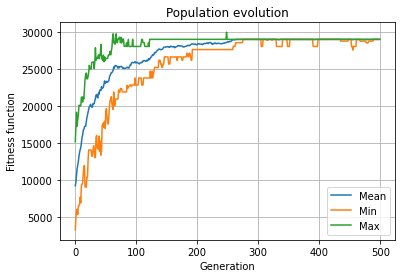

No solution was found, in 500 generations
Experiment:  4
Number of generations: 500
Max FF: 28410
Min FF: 28410
Mean FF: 28410.0


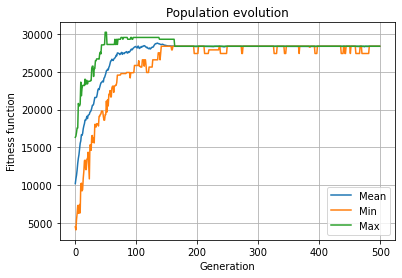

No solution was found, in 500 generations
Experiment:  5
Number of generations: 500
Max FF: 30360
Min FF: 29880
Mean FF: 30206.4


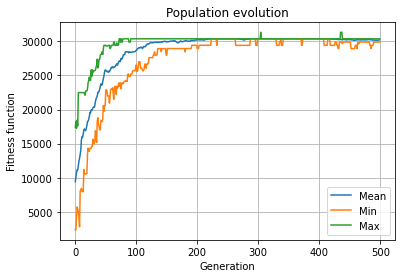

No solution was found, in 500 generations
Experiment:  6
Number of generations: 500
Max FF: 30240
Min FF: 29280
Mean FF: 30230.4


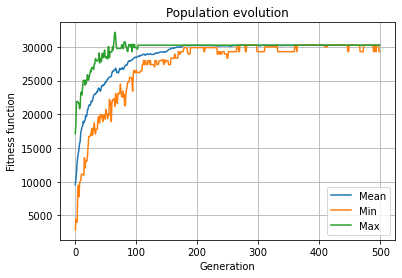

No solution was found, in 500 generations
Experiment:  7
Number of generations: 500
Max FF: 31260
Min FF: 31260
Mean FF: 31260.0


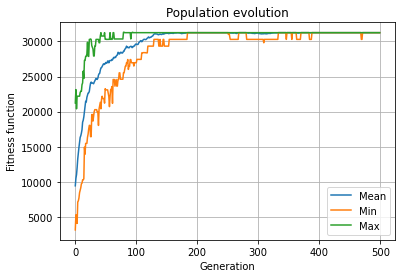

No solution was found, in 500 generations
Experiment:  8
Number of generations: 500
Max FF: 31680
Min FF: 29760
Mean FF: 31372.8


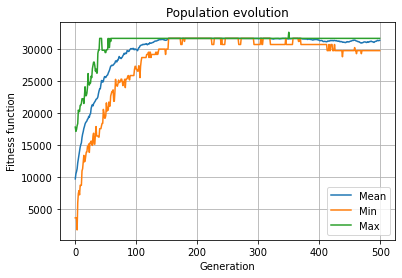

No solution was found, in 500 generations
Experiment:  9
Number of generations: 500
Max FF: 33180
Min FF: 33180
Mean FF: 33180.0


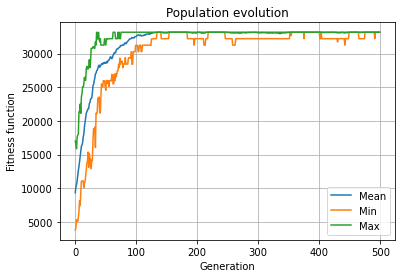

No solution was found, in 500 generations


In [41]:
display_best_experiment(reports_10)

### Worst experiment result

Experiment:  0
Number of generations: 500
Max FF: 29670
Min FF: 29670
Mean FF: 29670.0


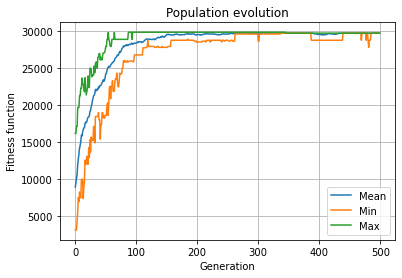

Experiment:  1
Number of generations: 500
Max FF: 30270
Min FF: 30270
Mean FF: 30270.0


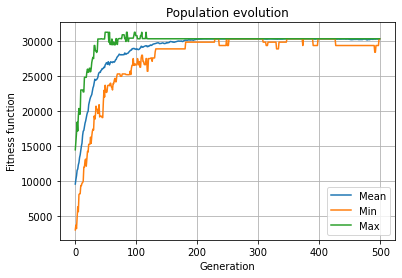

Experiment:  2
Number of generations: 500
Max FF: 31320
Min FF: 30360
Mean FF: 31300.8


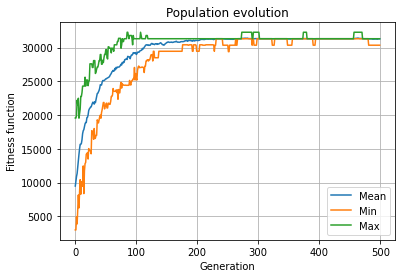

Experiment:  3
Number of generations: 500
Max FF: 29040
Min FF: 29040
Mean FF: 29040.0


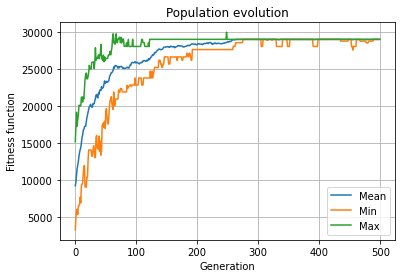

Experiment:  4
Number of generations: 500
Max FF: 28410
Min FF: 28410
Mean FF: 28410.0


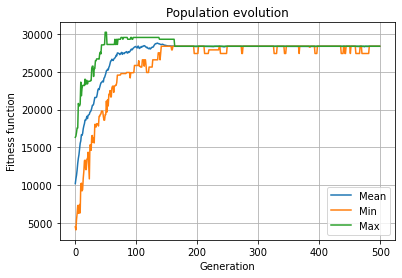

Experiment:  5
Number of generations: 500
Max FF: 30360
Min FF: 29880
Mean FF: 30206.4


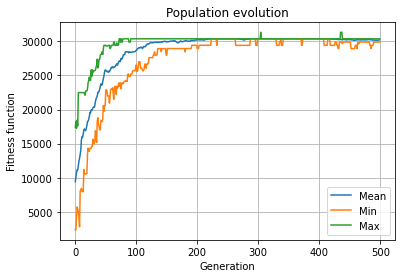

Experiment:  6
Number of generations: 500
Max FF: 30240
Min FF: 29280
Mean FF: 30230.4


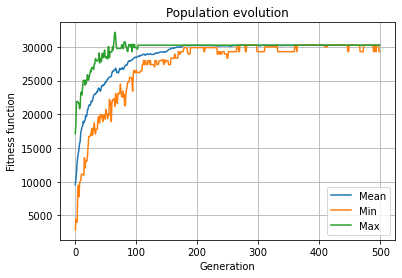

Experiment:  7
Number of generations: 500
Max FF: 31260
Min FF: 31260
Mean FF: 31260.0


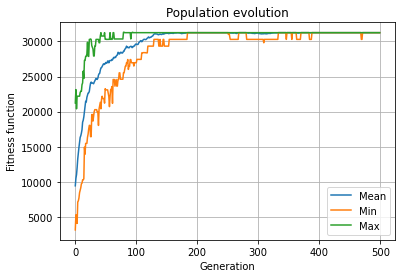

Experiment:  8
Number of generations: 500
Max FF: 31680
Min FF: 29760
Mean FF: 31372.8


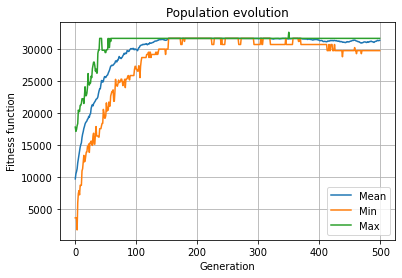

Experiment:  9
Number of generations: 500
Max FF: 33180
Min FF: 33180
Mean FF: 33180.0


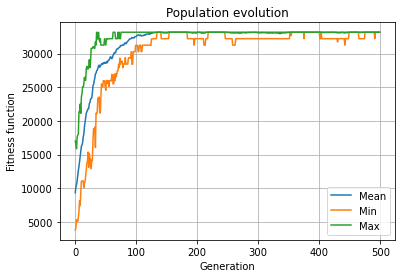

In [42]:
display_worst_experiment(reports_10)

### Average Result

In [43]:
display_average_result(p_10, reports_10)

Settings used:
* HIGHEST GENE: 9
* NUMBER OF EXPERIMENTS: 10
* NUMBER GENES: 20
* CHROMOSOME POPULATION: 100
* MAX FF: 38400
* CHROMOSOME POPULATION: 100
* MAX GENERATIONS: 500
* CROSSOVER PROB: 0.7
* MUTATION PROB: 0.001
The average of generations required to find the strongest FF is 500.0


,Generations,Max Fitness functions found,Min fitness function found,Average fistness function
1,500,29670,29670,29670.0
2,500,30270,30270,30270.0
3,500,31320,30360,31300.8
4,500,29040,29040,29040.0
5,500,28410,28410,28410.0
6,500,30360,29880,30206.4
7,500,30240,29280,30230.4
8,500,31260,31260,31260.0
9,500,31680,29760,31372.8
10,500,33180,33180,33180.0


## 11. Apply the genetic algorithm to a population with the following characteristics
* pc = 0,8
* pm = 0.005
* 20 genes
* 300 chromosomes
* 10 iterations
* The max number of generations for experiments was setted as 500
* FF = All ones

### All experiments results

In [44]:
p_11 = Population()
p_11.setting.CHROMOSOME_POPULATION = 300
p_11.setting.CROSSOVER_PROB = 0.8
p_11.setting.MUTATION_PROB = 0.005
p_11.setting.set_fitness_function("all ones")
p_11.setting.MAX_GENERATIONS = 500
p_11.setting.NUMBER_OF_EXPERIMENTS = 10
reports_11 = p_11.run_experiment()
# display_all_experiments(reports_11)

### Best experiment result

Experiment:  9
Number of generations: 53
Max FF: 38400
Min FF: 24550
Mean FF: 31672.533333333333


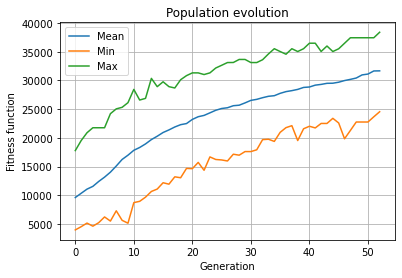

Solutions found:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [45]:
display_best_experiment(reports_11)

### Worst experiment result

Experiment:  3
Number of generations: 500
Max FF: 37440
Min FF: 35520
Mean FF: 37001.6


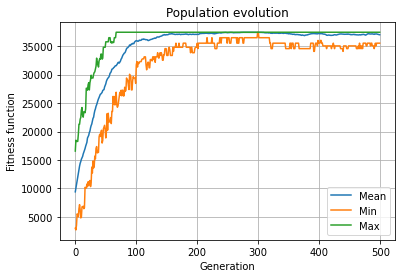

Experiment:  7
Number of generations: 500
Max FF: 37440
Min FF: 35520
Mean FF: 37161.6


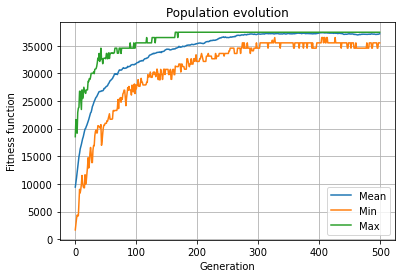

Experiment:  8
Number of generations: 500
Max FF: 36480
Min FF: 34560
Mean FF: 36256.0


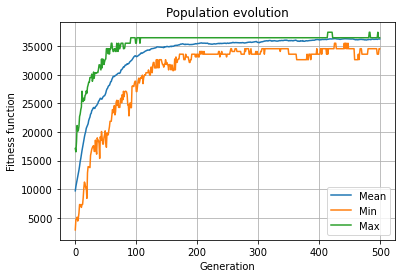

In [46]:
display_worst_experiment(reports_11)

### Average Result

In [47]:
display_average_result(p_11, reports_11)

Settings used:
* HIGHEST GENE: 9
* NUMBER OF EXPERIMENTS: 10
* NUMBER GENES: 20
* CHROMOSOME POPULATION: 300
* MAX FF: 38400
* CHROMOSOME POPULATION: 300
* MAX GENERATIONS: 500
* CROSSOVER PROB: 0.8
* MUTATION PROB: 0.005
The average of generations required to find the strongest FF is 227.7


,Generations,Max Fitness functions found,Min fitness function found,Average fistness function
1,64,38400,27000,32907.966667
2,231,38400,35520,37267.200000
3,94,38400,27400,33578.200000
4,500,37440,35520,37001.600000
5,138,38400,31800,35892.400000
6,108,38400,30270,34795.100000
7,89,38400,26160,33051.700000
8,500,37440,35520,37161.600000
9,500,36480,34560,36256.000000
10,53,38400,24550,31672.533333


## 12. Apply the genetic algorithm to a population with the following characteristics
* pc = 0,8
* pm = 0.005
* 20 genes
* 300 chromosomes
* 10 iterations
* The max number of generations for experiments was setted as 500
* FF = Queens in peace

### All experiments results

In [48]:
p_12 = Population()
p_12.setting.CHROMOSOME_POPULATION = 300
p_12.setting.CROSSOVER_PROB = 0.8
p_12.setting.MUTATION_PROB = 0.005
p_12.setting.set_fitness_function("queens in peace")
p_12.setting.MAX_GENERATIONS = 500
p_12.setting.NUMBER_OF_EXPERIMENTS = 10
reports_12 = p_12.run_experiment()
# display_all_experiments(reports_12)

### Best experiment result

Experiment:  1
Number of generations: 33
Max FF: 28
Min FF: 14
Mean FF: 21.45


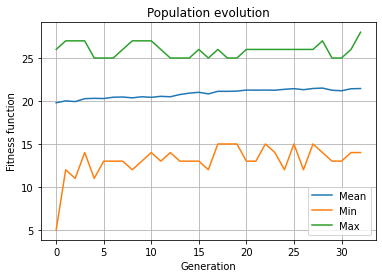

Solutions found:
[5, 3, 1, 7, 4, 6, 0, 2]


In [49]:
display_best_experiment(reports_12)

### Worst experiment result

Experiment:  0
Number of generations: 500
Max FF: 27
Min FF: 25
Mean FF: 26.883333333333333


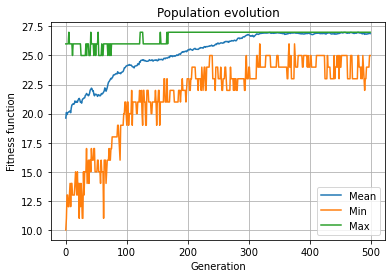

Experiment:  2
Number of generations: 500
Max FF: 26
Min FF: 23
Mean FF: 25.976666666666667


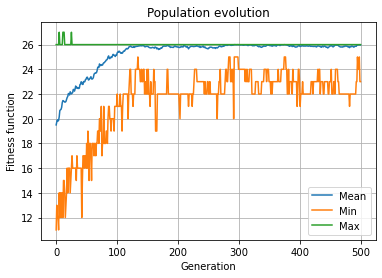

Experiment:  3
Number of generations: 500
Max FF: 27
Min FF: 24
Mean FF: 26.786666666666665


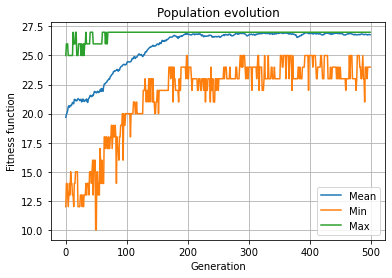

Experiment:  4
Number of generations: 500
Max FF: 26
Min FF: 24
Mean FF: 25.9


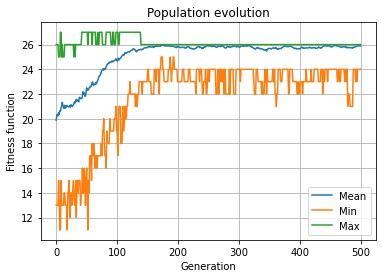

Experiment:  5
Number of generations: 500
Max FF: 27
Min FF: 24
Mean FF: 26.913333333333334


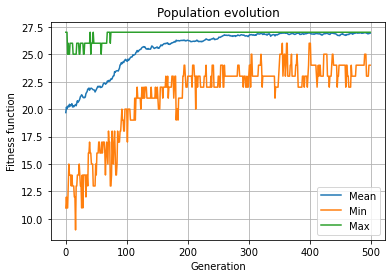

Experiment:  7
Number of generations: 500
Max FF: 27
Min FF: 24
Mean FF: 26.983333333333334


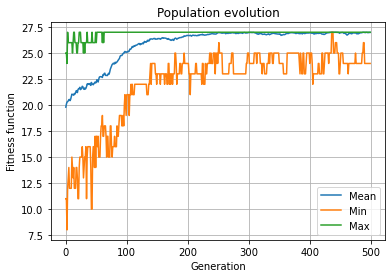

Experiment:  8
Number of generations: 500
Max FF: 25
Min FF: 22
Mean FF: 24.92


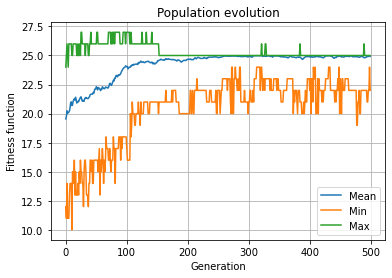

Experiment:  9
Number of generations: 500
Max FF: 27
Min FF: 24
Mean FF: 26.813333333333333


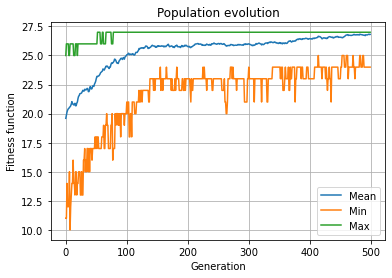

In [50]:
display_worst_experiment(reports_12)

### Average Result

In [51]:
display_average_result(p_12, reports_12)

Settings used:
* HIGHEST GENE: 7
* NUMBER OF EXPERIMENTS: 10
* NUMBER GENES: 8
* CHROMOSOME POPULATION: 300
* MAX FF: 28
* CHROMOSOME POPULATION: 300
* MAX GENERATIONS: 500
* CROSSOVER PROB: 0.8
* MUTATION PROB: 0.005
The average of generations required to find the strongest FF is 406.9


,Generations,Max Fitness functions found,Min fitness function found,Average fistness function
1,500,27,25,26.883333
2,33,28,14,21.450000
3,500,26,23,25.976667
4,500,27,24,26.786667
5,500,26,24,25.900000
6,500,27,24,26.913333
7,36,28,16,22.690000
8,500,27,24,26.983333
9,500,25,22,24.920000
10,500,27,24,26.813333
